#  Bar and QR code detector

![Life is short use Python](Bar_Images/code128_1.png)

This project is forked from [zbar](https://github.com/NaturalHistoryMuseum/pyzbar) library, I added few modification, so webcam can be used as an image reader to detect QR and Bar codes.

* Pure python
* Works with PIL / Pillow images, OpenCV / numpy `ndarray`s, and raw bytes
* Decodes locations of barcodes
* No dependencies, other than the zbar library itself
* Tested on Python 2.7, and Python 3.4 to 3.6

Here is a quick look of the final output:

![webcam QR detection](Capture.png)    


# Table of Contents

1. [Installation](#installation)
1. [Barcode Detector](#barcode-detector)
2. [QR code detector](##qr-code-detector)
3. [Using openCV](##using-openCV)    
    
    

## Installation

Mac OS X:

Install [Homebrew](https://brew.sh/):
```bash
/usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"
```

Install `zbar` lib:
```bash
brew install zbar
```

Linux:
```bash
sudo apt-get install libzbar0
```

Install this Python wrapper `pyzbar`; use the second form to install dependencies of the command-line scripts:
```bash
pip install pyzbar 
pip install pyzbar[scripts]
```

# Jupyter Notebook:
Go to see the Jupyter Notebook for more details.

1. [QR_Bar_Code_Detector_Basic](https://github.com/cuicaihao/pyzbar/blob/master/QR_Bar_Code_Detector_Basic.ipynb)
2. [QR_Bar_Code_Detector_Webcam](https://github.com/cuicaihao/pyzbar/blob/master/QR_Bar_Code_Detector_Webcam.ipynb)


## Barcode detector
Here are two samples of barcodes:

- LifeIsShortUsePython   
![Sample 1](Bar_Images/code128_1.png)

- HelloPython!
![Sample 2](Bar_Images/code128_2.gif)

Now using the decode function to read the images:

In [1]:
from pyzbar.pyzbar import decode
from PIL import Image

In [2]:
output_codes = decode(Image.open('Bar_Images/code128_1.png'))
print(output_codes)

[Decoded(data=b'LifeIsShortUsePython', type='CODE128', rect=Rect(left=29, top=11, width=0, height=16), polygon=[Point(x=29, y=11), Point(x=29, y=27)])]


In [3]:
print(type(output_codes))
print(len(output_codes)) # how many barcodes are found.

<class 'list'>
1


In [4]:
for code in output_codes:
    print(code)
    print('data: ', code.data)
    print('type: ', code.type)
    print('rect: ', code.rect)
    print('polygon:', code.polygon)

Decoded(data=b'LifeIsShortUsePython', type='CODE128', rect=Rect(left=29, top=11, width=0, height=16), polygon=[Point(x=29, y=11), Point(x=29, y=27)])
data:  b'LifeIsShortUsePython'
type:  CODE128
rect:  Rect(left=29, top=11, width=0, height=16)
polygon: [Point(x=29, y=11), Point(x=29, y=27)]


Take a good look of the output List:
```python
[
    Decoded(
        data=b'LifeIsShortUsePython', type='CODE128',
        rect=Rect(left=29, top=11, width=0, height=16),
        polygon=[
            Point(x=29, y=11), 
            Point(x=29, y=27)
            ]
        )
]
```

Similar results can be obtained by the following code on Sample_02:

In [5]:
decode(Image.open('Bar_Images/code128_2.gif')) # it support different image format

[Decoded(data=b'HelloPython!', type='CODE128', rect=Rect(left=4, top=0, width=324, height=75), polygon=[Point(x=4, y=1), Point(x=4, y=75), Point(x=328, y=74), Point(x=328, y=0)])]

## QR code detector

Here are two samples of QR codes:

- La Trobe University website   
![Sample 1](QR_Images/QR_Latrobe.png)
- Melbourne City Websit
![Sample 2](QR_Images/QR_Melbourne.png)

You can use your QR scan app on your mobilephone to check them.

Now using the decode function to read the images:

In [6]:
decode(Image.open('QR_Images/QR_latrobe.png'))

[Decoded(data=b'https://www.latrobe.edu.au/', type='QRCODE', rect=Rect(left=38, top=38, width=223, height=223), polygon=[Point(x=38, y=259), Point(x=261, y=261), Point(x=259, y=38), Point(x=39, y=39)])]

In [7]:
decode(Image.open('QR_Images/QR_melbourne.png'))

[Decoded(data=b'http://www.melbourne.vic.gov.au/Pages/home.aspx', type='QRCODE', rect=Rect(left=33, top=33, width=234, height=234), polygon=[Point(x=33, y=33), Point(x=33, y=266), Point(x=267, y=267), Point(x=266, y=33)])]

## Dran the polygon of the QR codes


In [8]:
from PIL import Image, ImageDraw

image = Image.open('QR_Images/QR_latrobe.png').convert('RGB')
print(type(image))
draw = ImageDraw.Draw(image)
for code in decode(image):
    rect = code.rect
    draw.rectangle(
        (
            (rect.left, rect.top),
            (rect.left + rect.width, rect.top + rect.height)
        ),
        outline='#0080ff'
    )    
    draw.polygon(code.polygon, outline='#e945ff')
    
image.save('QR_Images/QR_latrobe_bounding_box_and_polygon.png')

<class 'PIL.Image.Image'>


Check the output:
- QR_latrobe with bounding box and polygon: 
![output](QR_Images/QR_latrobe_bounding_box_and_polygon.png)


# Using OpenCV

### Showing the orignal QR figure

3.4.1


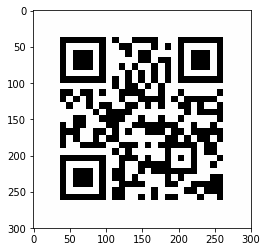

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline
print(cv2.__version__)
img = cv2.imread('QR_Images/QR_latrobe.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray')

### Draw the Polygon:

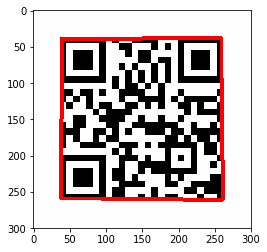

In [10]:
for code in decode(img):
    points = code.polygon
    # If the points do not form a quad, find convex hull
    if len(points) > 4 : 
        hull = cv2.convexHull(np.array([point for point in points], dtype=np.float32))
        hull = list(map(tuple, np.squeeze(hull)))
    else : 
        hull = points
    # Number of points in the convex hull
    n = len(hull)     
    # Draw the convext hull
    for j in range(0,n):
        cv2.line(img, hull[j], hull[ (j+1) % n], (255,0,0), 3)
        
plt.imshow(img, cmap = 'gray')

### Display the decoded text

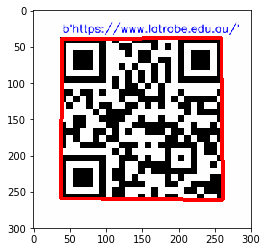

In [11]:
for code in decode(img):
    x = code.rect.left
    y = code.rect.top
    barCode = str(code.data)
    cv2.putText(img, barCode, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
            
plt.imshow(img, cmap = 'gray')    
    

False

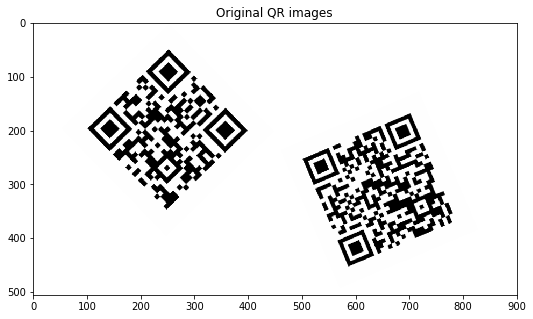

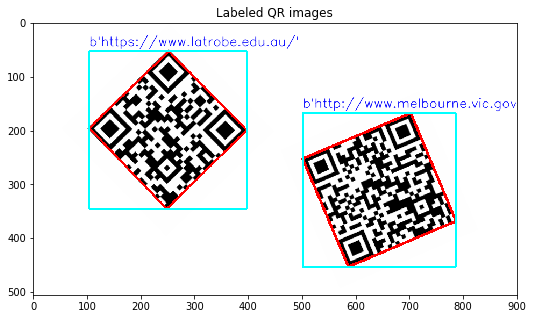

In [12]:
## Complex QR figures
img = cv2.imread('QR_Images/QR_complex.png')

plt.figure(figsize = (9, 5))
plt.imshow(img, cmap = 'gray')  
plt.title('Original QR images')

for code in decode(img):
    points = code.polygon
    # If the points do not form a quad, find convex hull
    if len(points) > 4 : 
        hull = cv2.convexHull(np.array([point for point in points], dtype=np.float32))
        hull = list(map(tuple, np.squeeze(hull)))
    else : 
        hull = points
    # Number of points in the convex hull
    n = len(hull)     
    
    # Draw the convext hull/ polygon
    for j in range(0,n):
        cv2.line(img, hull[j], hull[ (j+1) % n], (255,0,0), 3)
    
    # draw text    
    x = code.rect.left
    y = code.rect.top    
    w = code.rect.width 
    h = code.rect.height
    
    # draw bounding box
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
    barCode = str(code.data)
    cv2.putText(img, barCode, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 1, cv2.LINE_AA)
    
# Draw output
plt.figure(figsize = (9, 5))
plt.imshow(img, cmap = 'gray') 
plt.title('Labeled QR images')
cv2.imwrite('QR_Image/QR_complex_labeld.png', img)
  

Go to next jupyter notebook: [QR_Bar_Code_Detector_Webcam](https://github.com/cuicaihao/pyzbar/blob/master/QR_Bar_Code_Detector_Webcam.ipynb)


**END**